<h1 align=center><font size = 5>The Battle of Neighborhoods in New York City</font></h1>

<h1 align=center><font size = 2>Applied Data Science Capstone by IBM/Coursera</font></h1>

# **Objective**

**You will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.**

# **Introduction: Background**

**Among all the widely consumed beverages in the world, coffee and tea is consider the top selection. In Canada, according to Coffee Association of Canada the coffee industry is a $6.2 billion industries with over 5,000 independent cafe and coffee shops.
Beside independent coffee shops, you have major chain coffee shop like Starbucks, Country Styles, Second Cup and the biggest of them all Tim Horton's with over 3,800 locations.**


# **Problem**

**Through online research of Coffee and Tea in Canada I discovered my favorite coffee chain shop is not in Canada. My favorite chain is Coffee Beans and Tea Leaf. Coffee Beans and Tea Leaf started out in my home state of California. It has expanded into 32 different countries but not in Canada. The scenario that I have come up with is "What if Coffee Beans and Tea Leaf decided to expand to Toronto where will the hotspot be?". My goal is to find the area in Toronto where Coffee Beans and Tea Leaf company should open their first location where are plenty of coffee drinkers and gauge if there is a market for expansion in Canada.**

# **Mythodology**

**In this project we will direct our efforts to detect the area in Toronto that have highest density in coffee shop and Cafe.
An area with high density in coffee shop meaning there is a high demand for it. With the said, to test the market with first start in the country reception is very important.
Starting a shop in an area with high demand and competition can help gage the market.
The first step is to identify the neighborhoods in Toronto by using the postal code in wikipedia that we use in our previous lab and plug in the geographic location.
Second step is create a dataframe with Foursquares information of all the coffee shop and cafe location in Toronto.
Third step is mapplot the location to determine the area that is dense with coffee.
And last, we will mark cluster the area to pinpoint a geographic location that is suitable for the shop.**

# **Description of the Data**

**I will be using postal codes provide from wikipedia as neighborhood or the hotspot to recommend Coffee Beans and Tea Leafs for there intial location.
I will also be using foursquare data with geolocater and cluster to determine where customer will likely frequent for coffee.**

**1. Link: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"**

**Using Postal Codes to define hotspot in Toronto**

**2. Foursquare.com - category - coffee shop**

**Using foursquare data to fine the hotspot for coffee shop with clusters in Toronto**

# **Python packages and Dependencies:**

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from bs4 import BeautifulSoup # library for extract data from HTML or XML

!pip install folium

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [202]:
!conda install -c conda-forge geopy # convert an address into latitude and longitude values
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\liuwe\Downloads>if exist C:\Users\liuwe\anaconda3\Library\share\proj\copyright_and_licenses.csv (
rem proj-data is installed because its license was copied over  
 
)  else () 


In [4]:
from folium.plugins import FastMarkerCluster

# **Data curation and Wrangling**

In [5]:
# Load article, turn into soup and get the <table>s.
source = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
table_class = 'wikitable sortable .text'
response = requests.get(source)
soup = BeautifulSoup(response.text, 'xml')
list=soup.find('table')


In [6]:
# Creating new dataframe with three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)
df

,Postalcode,Borough,Neighborhood


In [7]:
# Transforming rows for postcode,borough and neighborhood to df 

for tr_cell in list.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data


In [8]:
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [9]:
# Ignore cells with a borough that is 'Not assigned'.
df=df[df['Borough']!='Not assigned']
df.head()

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [10]:
# Use the Geocoder package or the csv file to create geographical coordinates of a given postal code.

geo_df=pd.read_csv('http://cocl.us/Geospatial_data') # Read a csv file into Df

In [11]:
geo_df.head ()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True) # rename Postal Code to Postalcode
geo_merged = pd.merge(geo_df, df, on='Postalcode') # merge csv with df in part 1 using Postalcode

In [13]:
neighborhoods=geo_merged[['Postalcode','Borough','Neighborhood','Latitude','Longitude']] # creating a new strin

In [14]:
neighborhoods.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [206]:
neighborhoods.shape

(103, 5)

# **FourSquare API**

**Search and collect all Coffee and Cafe shop in Toronto Neighborhoods**

In [207]:
CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' # your Foursquare ID
CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM' # your Foursquare Secret
VERSION = '20180604' # Create a function to repeat the same process to all the neighborhoods in Toronto
categoryId = '4bf58dd8d48988d1e0931735' # Coffee categoryID according to foursquare

# Create a function to repeat the same process to all the neighborhoods in Toronto

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 1000 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(getNearbyVenues)
 

In [16]:
toronto=neighborhoods[neighborhoods['Borough'].str.contains("Toronto")] # new string borough that only contain the word Toronto
toronto.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [43]:
# run the above function on each neighborhood and create a new dataframe called toronto_venues
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'], 
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [44]:
print(toronto_venues.shape)
toronto_venues.head()

(853, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
1,"The Danforth West, Riverdale",43.679557,-79.352188,Leonidas Chocolates Cafe,43.678118,-79.349485,Café
2,"The Danforth West, Riverdale",43.679557,-79.352188,Marvel Coffee Co.,43.678630,-79.347460,Coffee Shop
3,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Frappe,43.678126,-79.348434,Coffee Shop
4,"The Danforth West, Riverdale",43.679557,-79.352188,Second Cup,43.677232,-79.352898,Coffee Shop


In [49]:
toronto_venues.rename(columns={'Venue Longitude':'Longitude','Venue Latitude':'Latitude','Venue Category':'Category'},inplace=True) #data cleansing
toronto_venues.drop(['Neighborhood Latitude','Neighborhood Longitude'],axis=1,inplace=True)

In [50]:
toronto_venues.head()

,Neighborhood,Venue,Latitude,Longitude,Category
0,The Beaches,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
1,"The Danforth West, Riverdale",Leonidas Chocolates Cafe,43.678118,-79.349485,Café
2,"The Danforth West, Riverdale",Marvel Coffee Co.,43.678630,-79.347460,Coffee Shop
3,"The Danforth West, Riverdale",Cafe Frappe,43.678126,-79.348434,Coffee Shop
4,"The Danforth West, Riverdale",Second Cup,43.677232,-79.352898,Coffee Shop


In [94]:
toronto_venues.shape

(853, 5)

# **Map Plotting and Mark Cluster**

In [21]:
conda install -c conda-forge geopy

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\liuwe\Downloads>if exist C:\Users\liuwe\anaconda3\Library\share\proj\copyright_and_licenses.csv (
rem proj-data is installed because its license was copied over  
 
)  else () 

Note: you may need to restart the kernel to use updated packages.


In [51]:
# Use geopy library to get the latitude and longitude values of Toronto.

address = 'Toronto, CA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [63]:
# create map and display it
toronto_map = folium.Map(location=[43.65, -79.38], zoom_start=12)

# display the map of Toronto
toronto_map

In [64]:
# instantiate a feature group for the Coffee in the dataframe
coffee = folium.map.FeatureGroup()

# loop through the Coffee and add each to the feature group
for lat, lng, in zip(toronto_venues.Latitude, toronto_venues.Longitude):
    coffee.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add coffee shop to map
toronto_map.add_child(coffee)

In [87]:
# Create a bar graph to pinpoint dense nieghborhood

coffee = toronto_venues.groupby('Neighborhood').count() # count how many coffee shop in each neighborhood
coffee.drop(['Latitude','Longitude','Category'],axis=1,inplace=True)
print(coffee)

                                                    Venue
Neighborhood                                             
Berczy Park                                            25
Brockton, Parkdale Village, Exhibition Place            6
CN Tower, King and Spadina, Railway Lands, Harb...      1
Central Bay Street                                     52
Christie                                                6
Church and Wellesley                                   26
Commerce Court, Victoria Hotel                         99
Davisville                                              6
Davisville North                                        3
Dufferin, Dovercourt Village                            2
First Canadian Place, Underground city                 99
Garden District, Ryerson                               54
Harbourfront East, Union Station, Toronto Islands      33
High Park, The Junction South                           2
India Bazaar, The Beaches West                          1
Kensington Mar

In [214]:
coffee.shape

(33, 1)

In [114]:
coffee.sort_values(by='Venue',ascending=True, inplace=True) # Sort data from highest to lowest

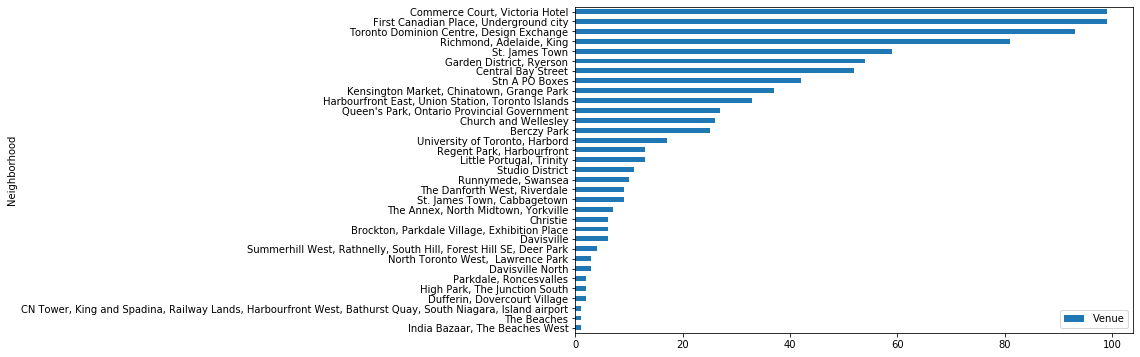

In [115]:
coffee.plot(kind='barh', figsize=(10, 6)) # bar graph plot

In [210]:
# Filter the top 4 neighborhoods 

TOP_4 = toronto_venues[toronto_venues.Neighborhood.isin(
    ['Commerce Court, Victoria Hotel',
     'First Canadian Place, Underground city',
     'Richmond, Adelaide, King',
     'Toronto Dominion Centre, Design Exchange'])]

In [211]:
TOP_4.head ()

,Neighborhood,Venue,Latitude,Longitude,Category
276,"Richmond, Adelaide, King",Cafe Landwer,43.648753,-79.385367,Café
277,"Richmond, Adelaide, King",M Square Coffee Co,43.651218,-79.383555,Coffee Shop
278,"Richmond, Adelaide, King",Bulldog On The Block,43.650652,-79.384141,Coffee Shop
279,"Richmond, Adelaide, King",DAVIDsTEA,43.650547,-79.383385,Tea Room
280,"Richmond, Adelaide, King",Pilot Coffee Roasters,43.648835,-79.380936,Coffee Shop


In [212]:
TOP_4.shape

(372, 5)

# **Mark Cluster the Top 4 Neighborhood**

In [213]:
from folium import plugins

# let's start again with a clean copy of the map of Toronto
Top4_map = folium.Map(location = [43.65, -79.38], zoom_start = 12)

# instantiate a mark cluster object for the stores in the dataframe
stores = plugins.MarkerCluster().add_to(Top4_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(TOP_4.Latitude, TOP_4.Longitude, TOP_4.Venue):
    folium.Marker(
        location=[lat, lng],
         icon=None,
    ).add_to(stores)

# display map
Top4_map

In [221]:
# geolocate the financial District

address = ' Toronto Financial District, Canada'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto Financial District are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Toronto Financial District are 43.6536032, -79.38400547469666.
